# Seaborn : Statistical Data Visualization

## Numerical Data Plotting
- relpolt()
- scatterplot()
- lineplot()

## Categorical Data Plotting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc

## Visualizing Distribution of Data
- histplot()/distplot()
- kdeplot()
- jointplot()
- rugplot()

## Linear Regression and Relationship
- regplot()
- impolt()

# Loading Libraries

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numerical Data Plotting

# Relplot() : kind = scatter

### Loading Dataset

In [41]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


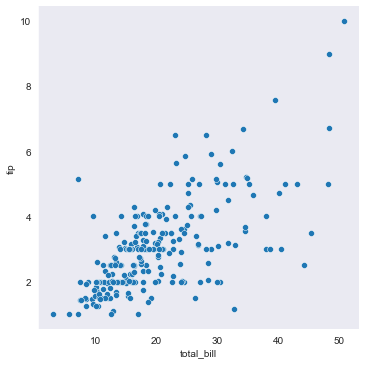

In [26]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips )

sns.set_style('darkgrid')

plt.show()

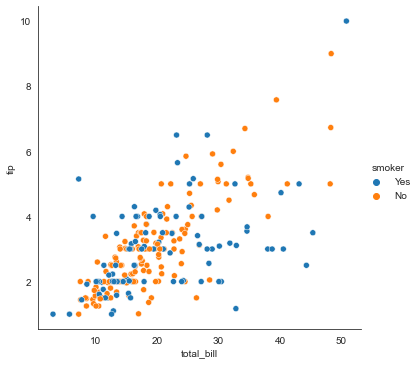

In [44]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

sns.set_style('white')

plt.show()

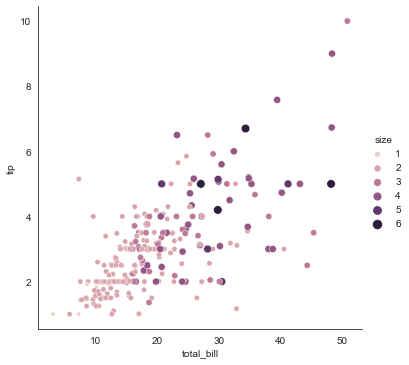

In [46]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'size', size = 'size')

plt.show()

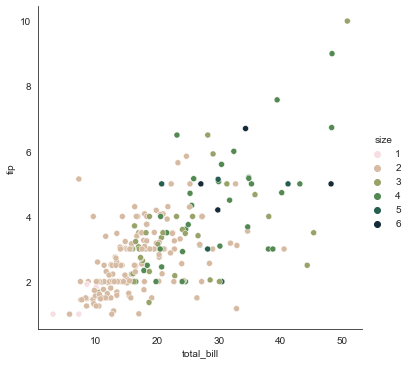

In [58]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'size', palette = 'ch:r = -0.8, l = 0.9')

plt.show()

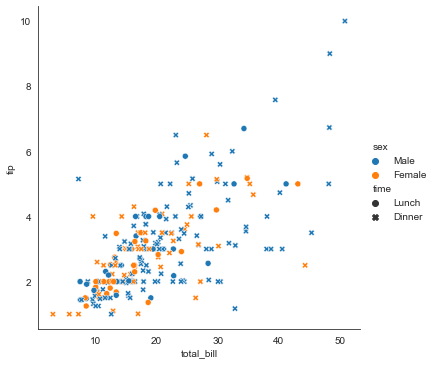

In [61]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', style = 'time')

plt.show()

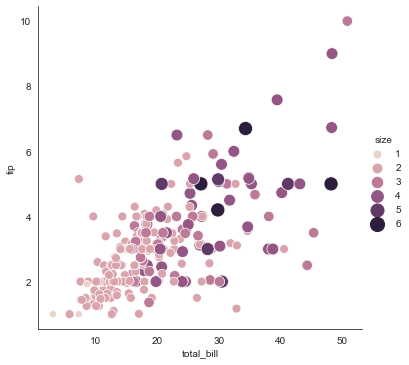

In [67]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (50, 200), hue = 'size')

plt.show()

# Relplot() : kind = line

## One Line Plot

### Generating a Random Dataset

- **This dataset is sorted along the column 'time'.** 

In [4]:
from numpy.random import randn
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))
df.head()

,time,value
0,0,-1.646790
1,1,0.516107
2,2,-0.921064
3,3,0.230848
4,4,-1.095119


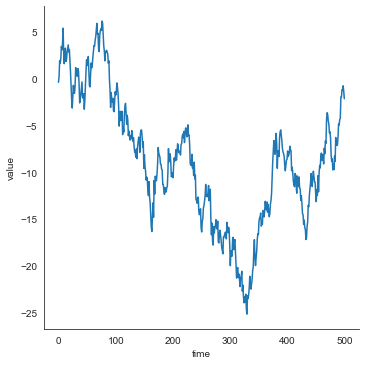

In [75]:
sns.relplot(x = 'time', y = 'value', data = df, kind = 'line')
plt.show()

- **This dataset is not sorted along any columns**

In [81]:
df2 = pd.DataFrame(randn(500,2).cumsum(axis = 0), columns = ['time', 'value'])
df2.head()

,time,value
0,-0.614219,-1.085370
1,-1.384408,-1.888193
2,-2.420642,-2.347025
3,-2.973640,-2.065168
4,-2.012564,-3.020315


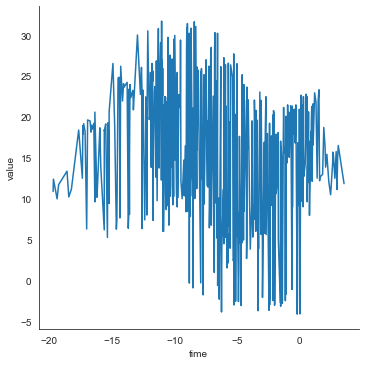

In [86]:
sns.relplot(x = 'time', y = 'value', data = df2, kind = 'line', sort = True)
plt.show()

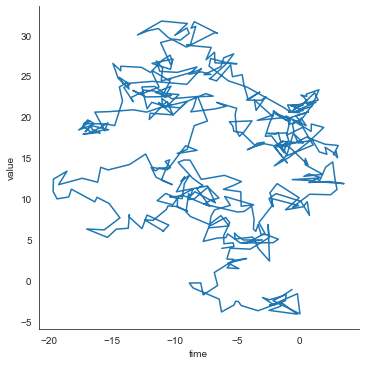

In [89]:
sns.relplot(x = 'time', y = 'value', data = df2, kind = 'line', sort = False)
plt.show()

- **This dataset is has multiple values for the same 'timepoint'**

In [10]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


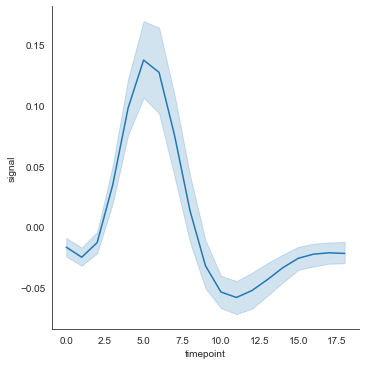

In [98]:
#the shaded region is confidence interval, the bold line shows 95% confidence in the value 
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri)
plt.show()

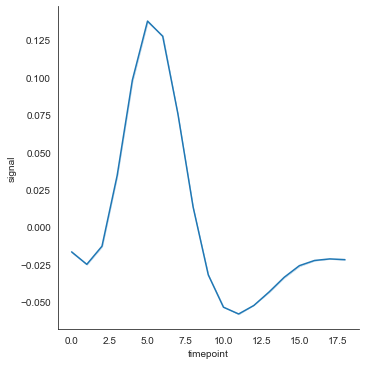

In [96]:
#we can turn off the ci by ci = False
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = False)
plt.show()

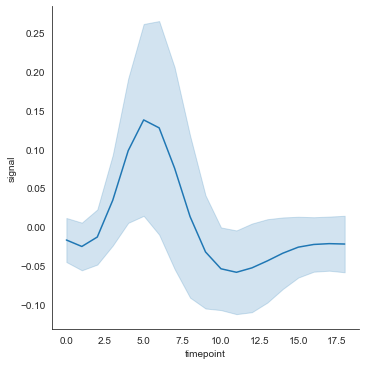

In [99]:
#we can show the standar deviation too
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')
plt.show()

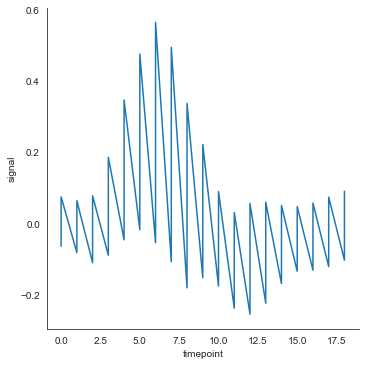

In [106]:
# estimator = None lots the real data set without ci 
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)
plt.show()

## Two Line Plot

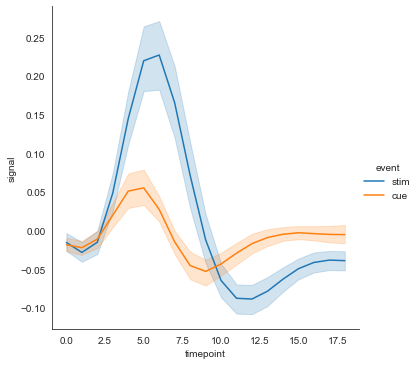

In [112]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event' , kind = 'line', data = fmri)
plt.show()

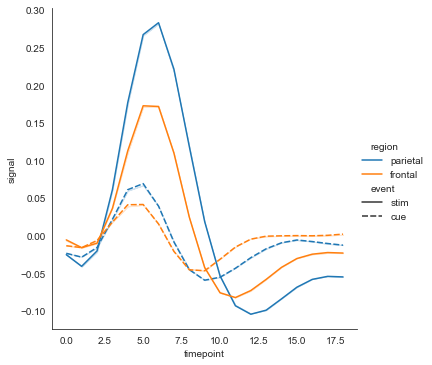

In [116]:
sns.relplot(x = 'timepoint', y = 'signal', style = 'event', hue = 'region', kind = 'line', data = fmri, ci = False)
plt.show()

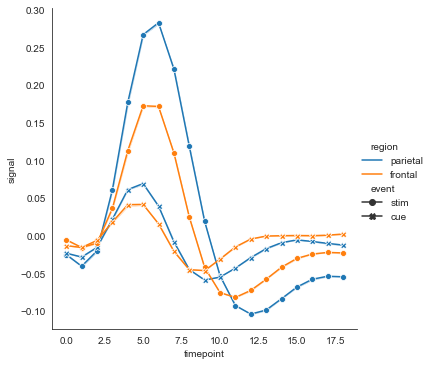

In [120]:
#adding markers
sns.relplot(x = 'timepoint', y = 'signal', style = 'event', hue = 'region', kind = 'line',
            data = fmri, ci = False, markers = True, dashes = False)
plt.show()

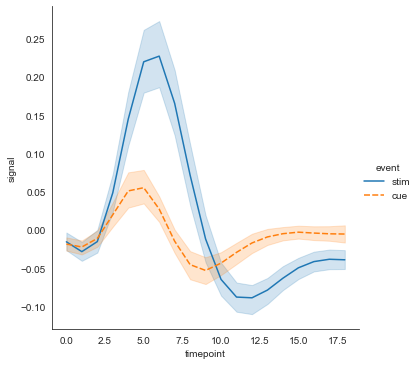

In [125]:
sns.relplot(x = 'timepoint', y = 'signal', style = 'event', hue = 'event', kind = 'line', data = fmri)
plt.show()

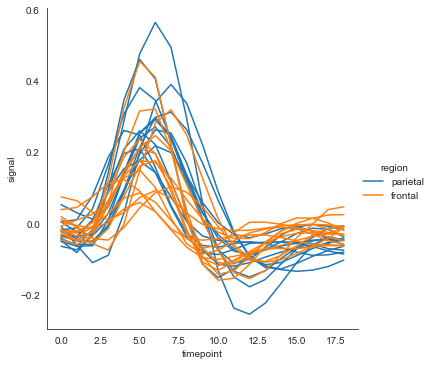

In [128]:
#query() helps to segregate the data
#units helps to plot multiple subjects in one plot
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri.query("event == 'stim'"), hue = 'region', 
            units = 'subject', estimator = None)
plt.show()

## Changing *default*  Sizes and Colors of the plots

### Creating a palette

In [31]:
dots = sns.load_dataset('dots').query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


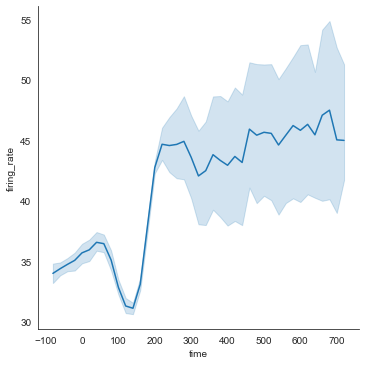

In [134]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line')
plt.show()

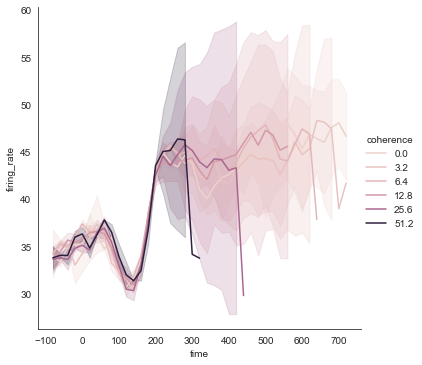

In [135]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence')
plt.show()

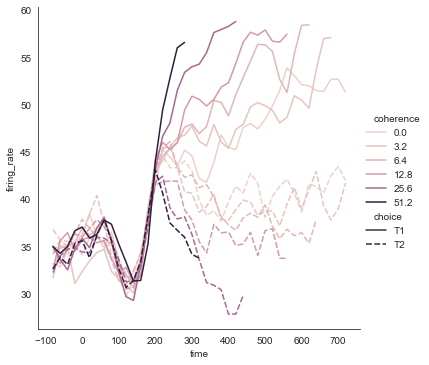

In [137]:
#as the hue colors are quite indistinguishable, we have to create a palette of our own
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')
plt.show()

In [162]:
#palette is created by cubehelix
palette = sns.cubehelix_palette(light = 0.8, n_colors = 6)
palette

[[0.9072879094300372, 0.7554704536803714, 0.7462376322879748],
 [0.8285819344135655, 0.5939685136446344, 0.6506580690069503],
 [0.7112429433992273, 0.44706244471928347, 0.582154114273226],
 [0.5475925095088021, 0.3183394743439307, 0.5067755143579389],
 [0.3615667891876727, 0.2135460683528729, 0.39972110388915943],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

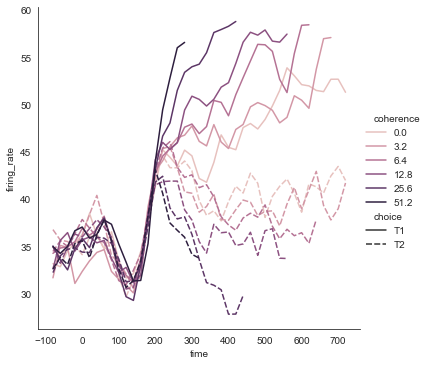

In [153]:
#now the hues are more distinguishable
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', 
            style = 'choice', palette = palette)
plt.show()

### Changing sizes of lines

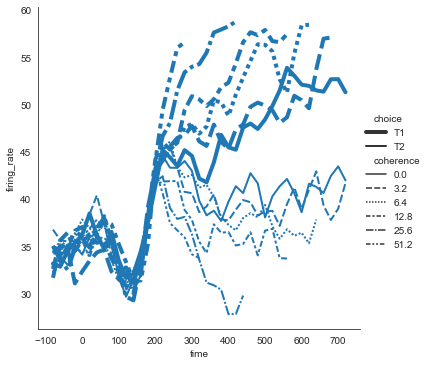

In [171]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', size = 'choice', style = 'coherence', 
            sizes = (2,4))
plt.show()

### Plotting with Date-Time

- **Creating a Dataset with Date values**

In [176]:
time = pd.DataFrame(dict(time = pd.date_range('2020-08-02', periods = 500), value = randn(500).cumsum()))
time.head()

,time,value
0,2020-08-02,0.046703
1,2020-08-03,-0.004820
2,2020-08-04,-1.465448
3,2020-08-05,-1.532988
4,2020-08-06,-1.353086


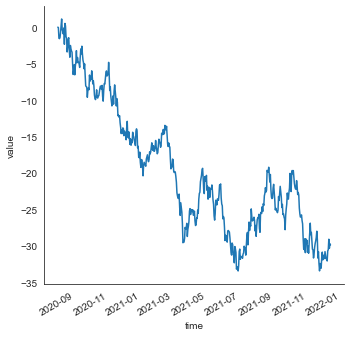

In [182]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = time)
#formats the date to fit the plot canvas
g.fig.autofmt_xdate()

## Creating Multi-Plots in the Same Canvas

In [183]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


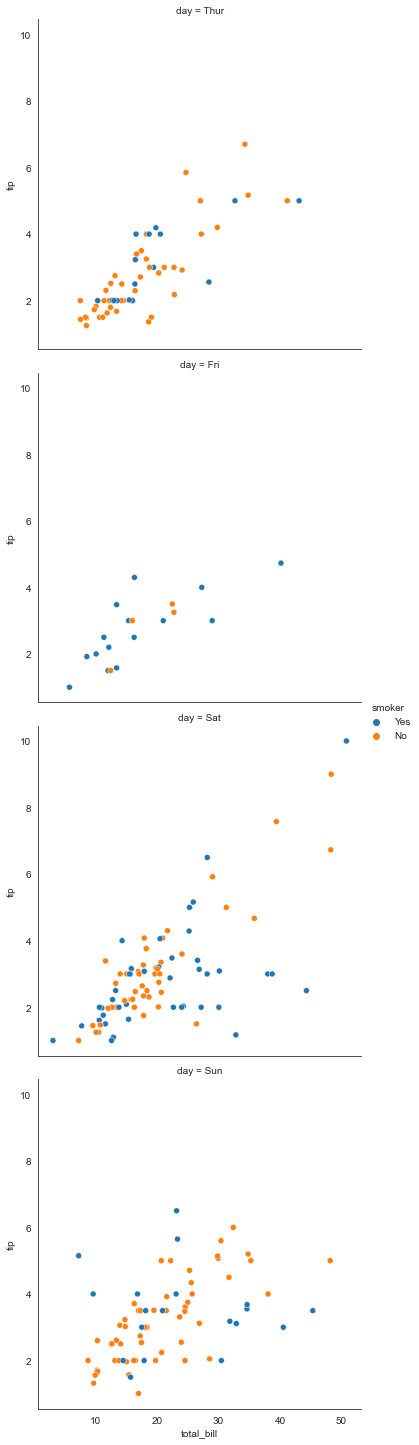

In [206]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', row = 'day')
plt.show()

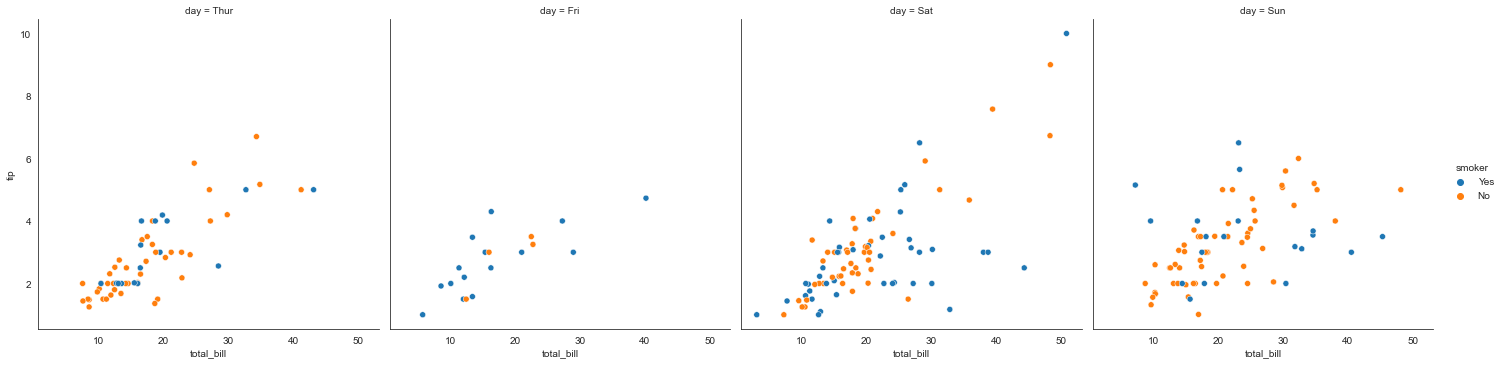

In [205]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', col = 'day')
plt.show()

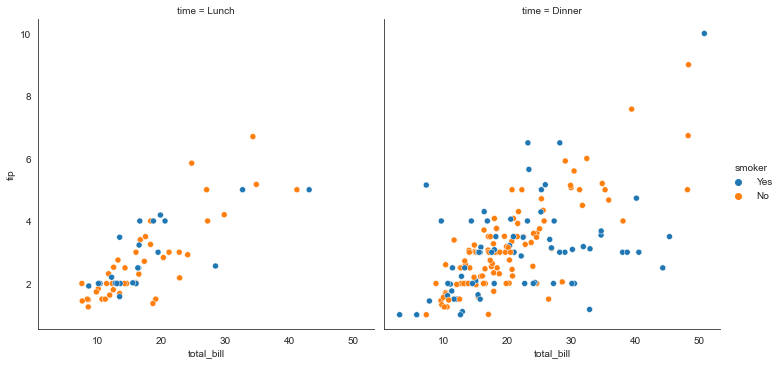

In [188]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', col = 'time')
plt.show()

### 2x2 Facet Grid

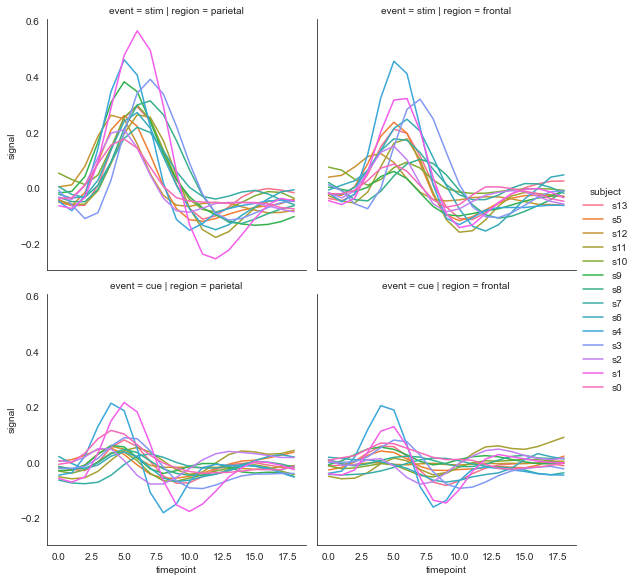

In [196]:
sns.relplot(x = 'timepoint', y = 'signal',hue = 'subject', col = 'region', row = 'event', height = 4, kind = 'line',
            data = fmri)
plt.show()

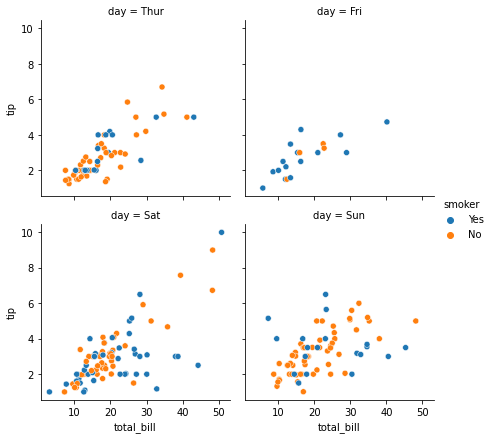

In [7]:
#col_wrap defines the no. of subplots thatare going to be simultaneously in line
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', col = 'day', col_wrap = 2, height = 3)
plt.show()

# Lineplot() 

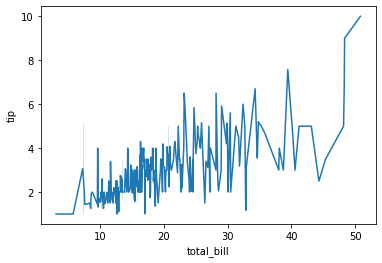

In [8]:
sns.lineplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

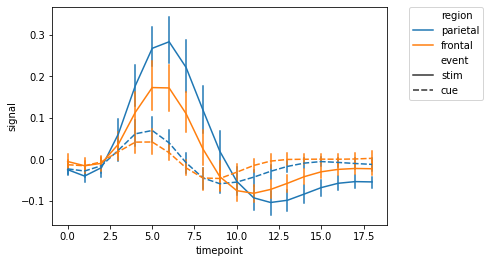

In [51]:
#err_style shows the range of errors
sns.lineplot(x = 'timepoint', y = 'signal', data = fmri, hue = 'region', style = 'event',
             err_style = 'bars')
plt.legend(bbox_to_anchor = (1.05, 1.025), loc = 'upper left')
plt.show()

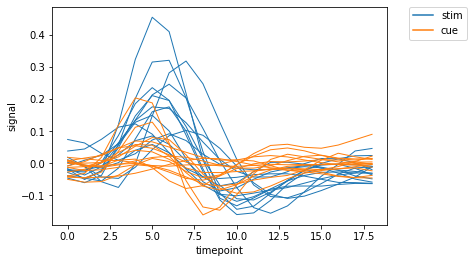

In [50]:
sns.lineplot(x = 'timepoint', y = 'signal', data = fmri.query("region == 'frontal'"), hue = 'event', 
             units = 'subject', estimator = None, lw = 1)
plt.legend(bbox_to_anchor = (1.05, 1.025), loc = 'upper left')

plt.show()

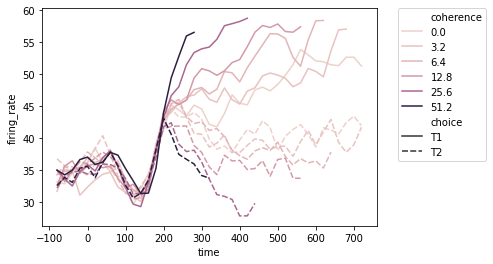

In [45]:
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence', style = 'choice', data = dots)
#putting legend outside of pot
plt.legend(bbox_to_anchor = (1.05, 1.025), loc = 'best')

plt.show()

# Scatterplot()

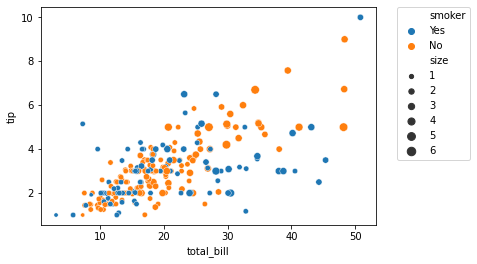

In [44]:
sns.scatterplot(x= 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size')
plt.legend(bbox_to_anchor = (1.05, 1.025), loc = 'best')
plt.show()

In [68]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


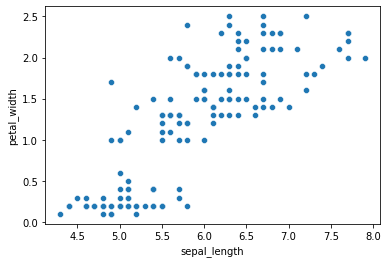

In [55]:
sns.scatterplot(x= 'sepal_length', y= 'petal_width', data = iris)
plt.show()

# Categorical Data Plotting

# Catplot()

### Loading Dataset

In [56]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Stripplot()

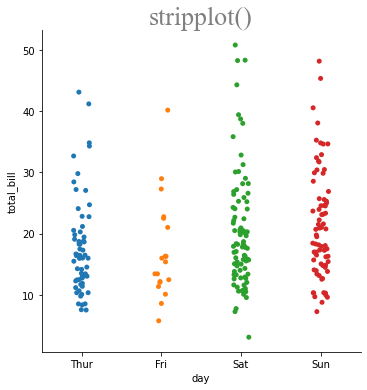

In [92]:
sns.catplot(x= 'day', y = 'total_bill', data = tips)
#adding title to the plot
plt.title('stripplot()', fontdict = {'fontname': 'Times New Roman', 'color': 'grey', 'fontsize' : '26'})
plt.show()

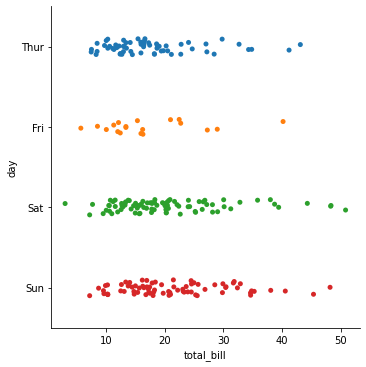

In [70]:
sns.catplot(y = 'day', x = 'total_bill', data = tips)
plt.show()

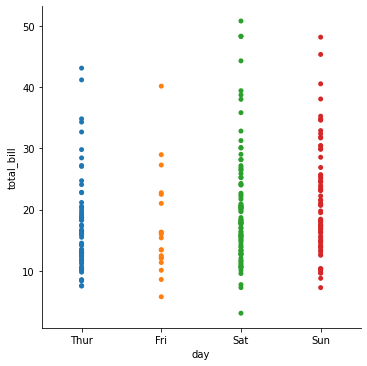

In [72]:
#jitter concentrates all the dots into one line
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)
plt.show()

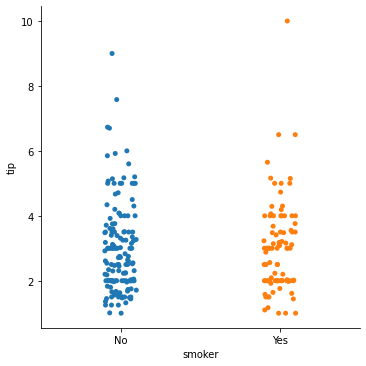

In [77]:
#reordering the axis labels
sns.catplot(x = 'smoker', y = 'tip', data = tips, order = ['No', 'Yes'])
plt.show()

## Swarmplot()

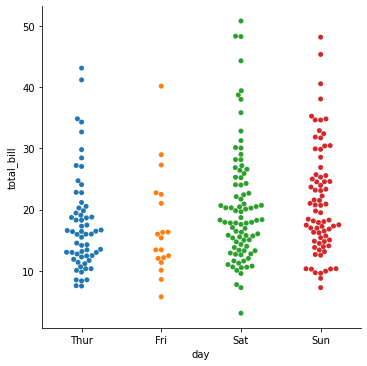

In [74]:
#swarm stops the overlapping of the dots
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm')
plt.show()

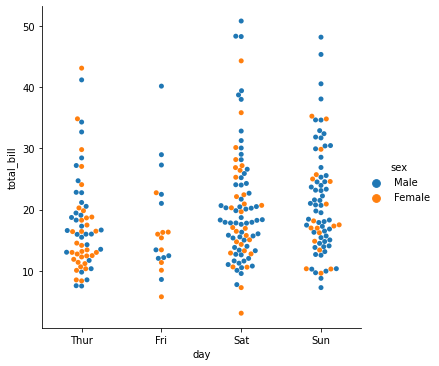

In [75]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'sex')
plt.show()

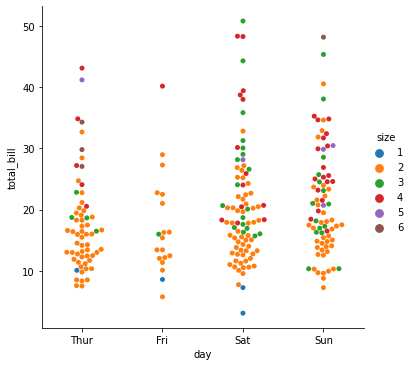

In [78]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'size')
plt.show()

## Boxplot()

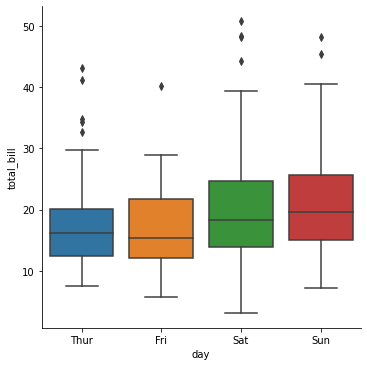

In [83]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'box', data = tips)
plt.show()

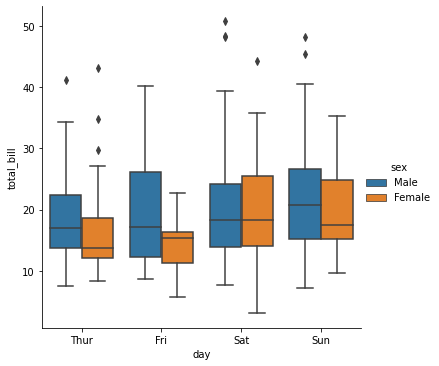

In [84]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'box', data = tips, hue ='sex')
plt.show()

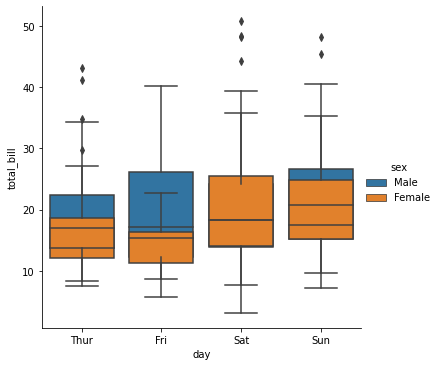

In [90]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'box', data = tips, hue ='sex', dodge = False)
plt.show()

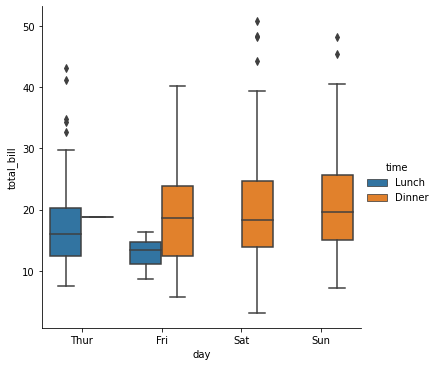

In [88]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'box', data = tips, hue ='time')
plt.show()

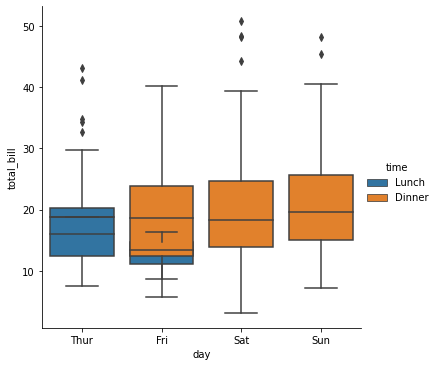

In [89]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'box', data = tips, hue ='time', dodge = False)
plt.show()

In [91]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Boxenplot()

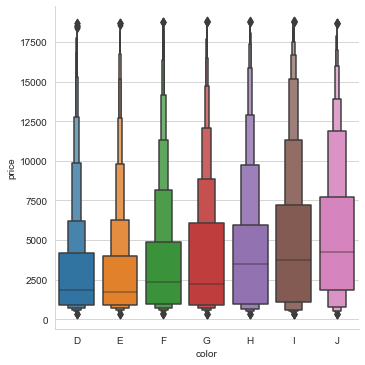

In [105]:
sns.catplot(x = 'color', y = 'price', data = diamonds, kind= 'boxen')
plt.show()

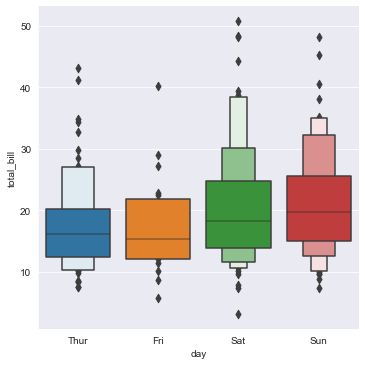

In [103]:
sns.catplot(x  ='day', y= 'total_bill', kind = 'boxen', data = tips, dodge = False)
sns.set_style('whitegrid')
plt.show()

## Violinplot()

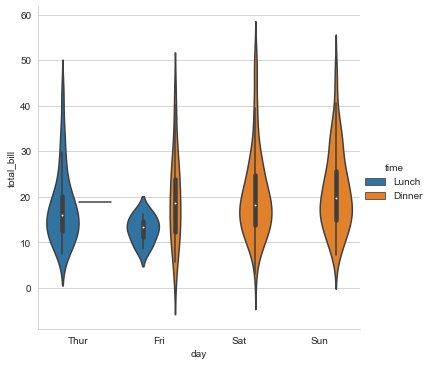

In [107]:
sns.catplot(y = 'total_bill', x = 'day', hue = 'time', data = tips, kind = 'violin')
plt.show()

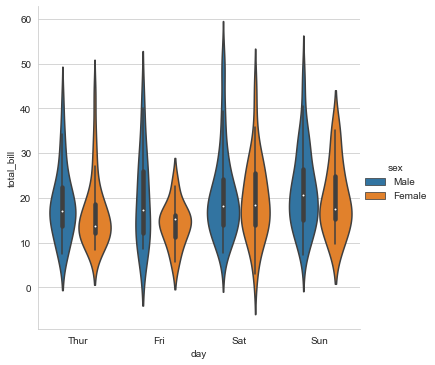

In [108]:
sns.catplot(y = 'total_bill', x = 'day', hue = 'sex', data = tips, kind = 'violin')
plt.show()

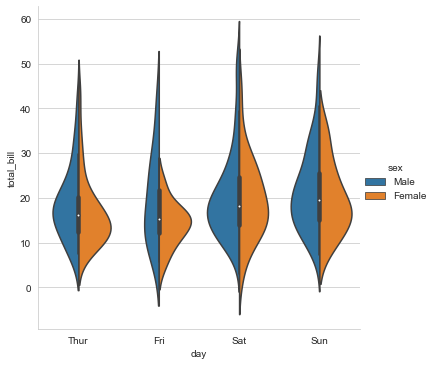

In [109]:
sns.catplot(y = 'total_bill', x = 'day', hue = 'sex', data = tips, kind = 'violin', split= True)
plt.show()

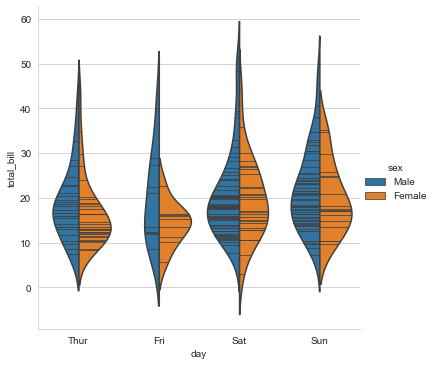

In [110]:
sns.catplot(y = 'total_bill', x = 'day', hue = 'sex', data = tips, kind = 'violin', split= True, inner = 'stick')
plt.show()

## Violinplot() & Swarmplot()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

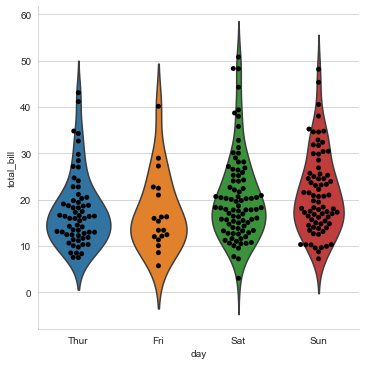

In [116]:
v = sns.catplot(y = 'total_bill', x = 'day', data = tips, kind = 'violin', inner = None)
sns.swarmplot(x= 'day', y = 'total_bill', data = tips , ax = v.ax, color = 'k')

## Barplot()

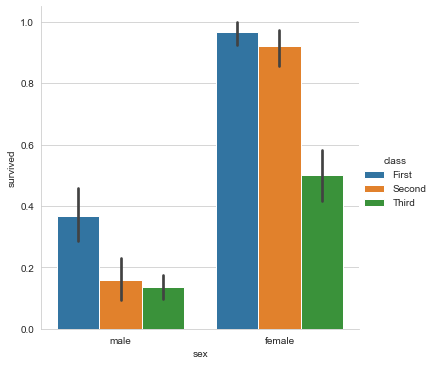

In [119]:
sns.catplot(x = 'sex', y = 'survived', data = titanic, hue = 'class', kind = 'bar')
plt.show()

## Boxplot() & Countplot()

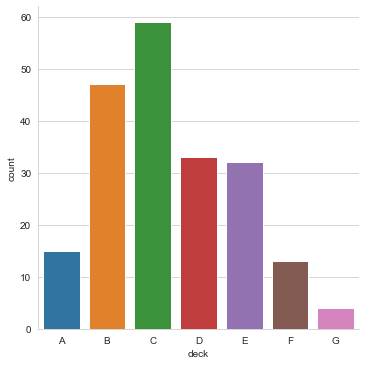

In [121]:
sns.catplot(x = 'deck', data = titanic, kind = 'count')
plt.show()

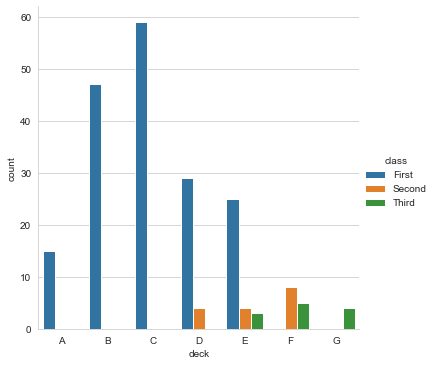

In [122]:
sns.catplot(x = 'deck', data = titanic, kind = 'count', hue = 'class')
plt.show()

## Pointplot()

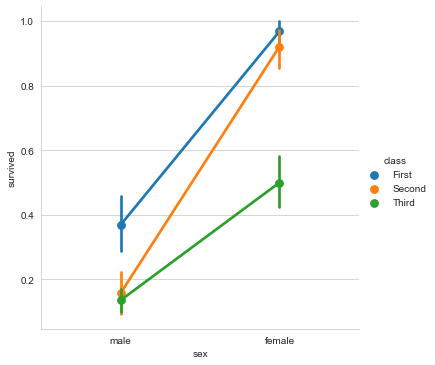

In [124]:
sns.catplot(x = 'sex', y = 'survived', data = titanic, hue = 'class', kind = 'point')
plt.show()

# Visualizing Distribution of Data

## Histplot()

In [12]:
x = randn(100)
x

array([ 1.03849761, -0.37672645, -1.43153686, -0.22816897,  1.81184077,
        0.38639951,  0.53608913, -0.18621981,  0.71423295, -0.61659147,
       -1.8110595 ,  0.84925892, -0.46794901,  0.60218716, -1.6764701 ,
        0.65032625, -0.08736699,  0.99687418,  0.66530761, -0.91549972,
       -0.19320073,  1.22425756,  0.95669515,  0.60678554,  0.20314522,
       -0.64208729,  0.50985479, -0.70023906,  0.03509268, -0.40293357,
        1.73259479, -0.0396044 , -0.11178577, -0.68514119, -0.28888548,
       -0.91279263, -0.08474102, -0.66675444, -0.62544381, -0.20116449,
        1.11445034,  1.33389295,  0.17959006, -0.01036273,  2.39500859,
        0.11992822,  0.27085085, -0.73093507, -0.28344056, -0.73020751,
        0.33993413,  1.05009823,  0.10055788, -0.22488009,  1.68049799,
        0.81219463,  0.50441191, -0.79379266,  1.1406055 ,  1.13813026,
       -0.74574608, -1.64367362, -0.01813715, -0.67425043, -1.92620524,
       -0.54931383,  0.28912791,  1.5635013 , -0.41319878,  1.85

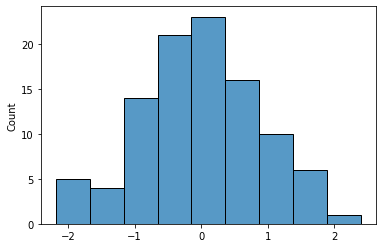

In [19]:
sns.histplot(x, kde = False)
plt.show()

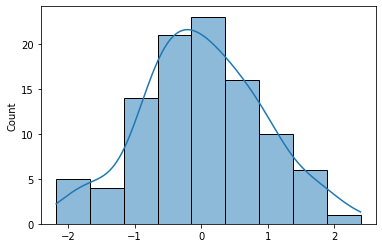

In [23]:
sns.histplot(x, kde = True)
plt.show()

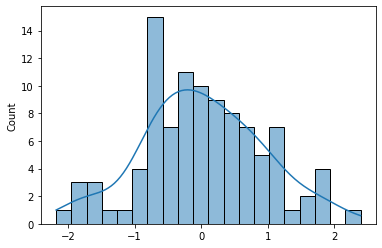

In [24]:
sns.histplot(x, kde = True, bins = 20)
plt.show()

## Kdeplot()

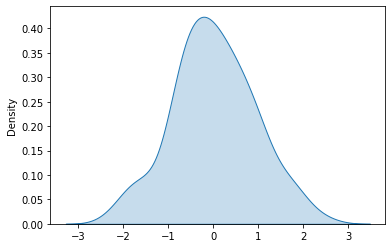

In [35]:
sns.kdeplot(x, shade = True)
plt.show()

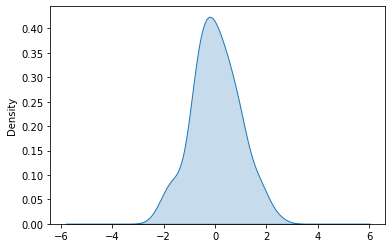

In [38]:
# cut tapers the curve line
sns.kdeplot(x, shade = True, cut = 10)
plt.show()

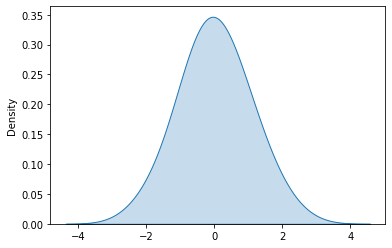

In [39]:
# bw_adjust smoothens the curve line
sns.kdeplot(x, shade = True, bw_adjust = 2)
plt.show()

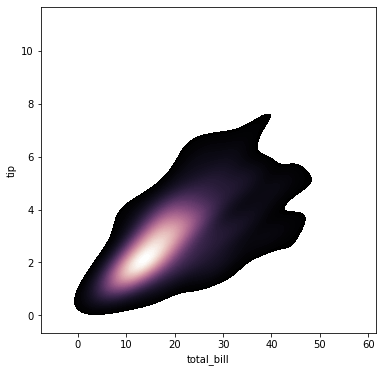

In [66]:
f, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0 ,light = 1, reverse = True)
sns.kdeplot(x = 'total_bill', y = 'tip', data = tips, cmap = cmap, n_levels = 100, shade = True)
plt.show()

## Jointplot()

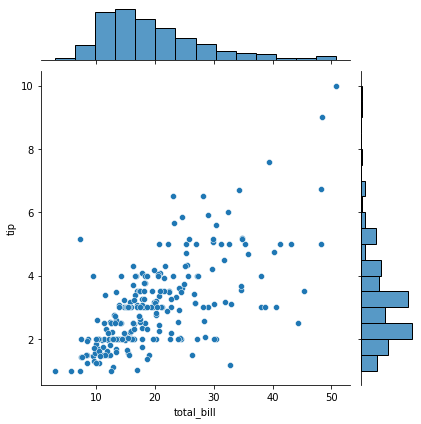

In [42]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

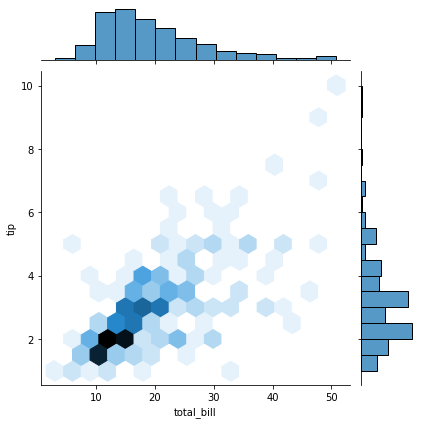

In [46]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')
plt.show()

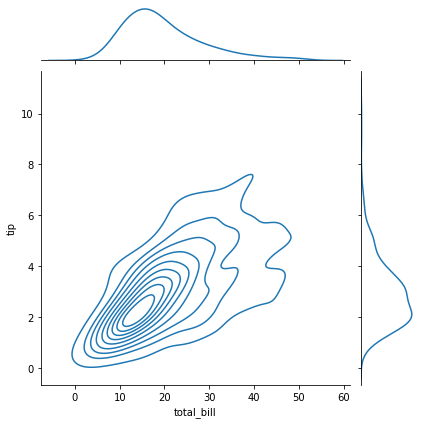

In [47]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')
plt.show()

## Pairplot()

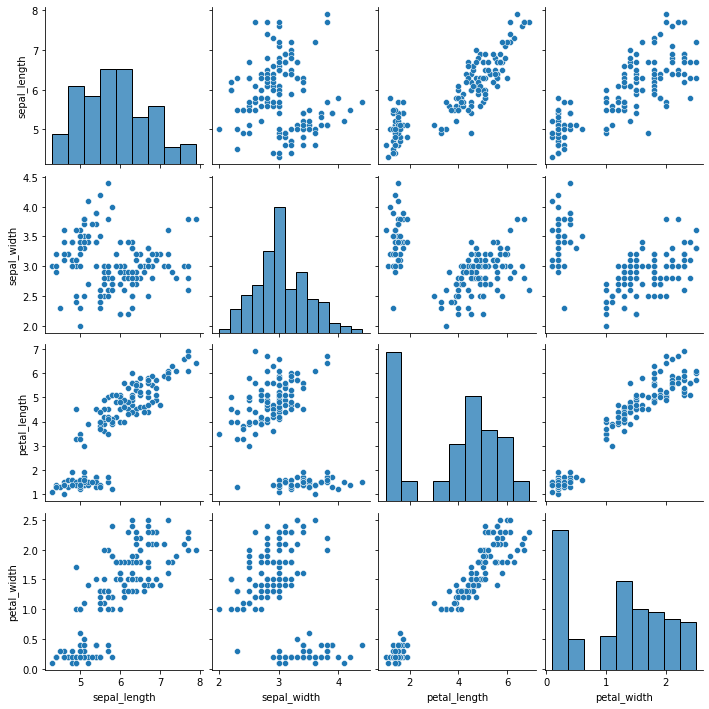

In [70]:
sns.pairplot(iris)
plt.show()

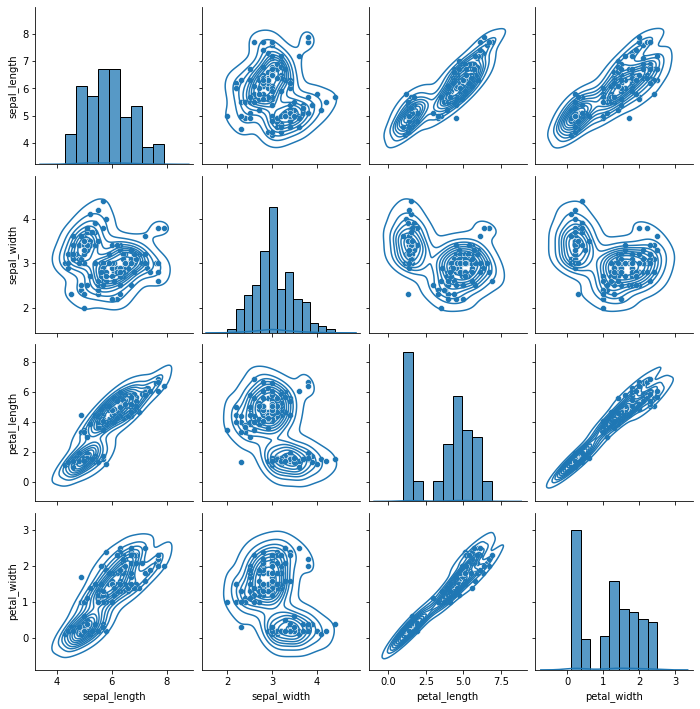

In [74]:
g = sns.pairplot(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)
plt.show()

# Linear Regression and Relationship

## Regplot()

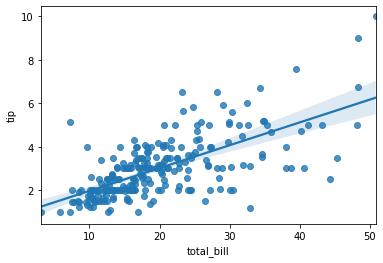

In [82]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

## Lmplot()

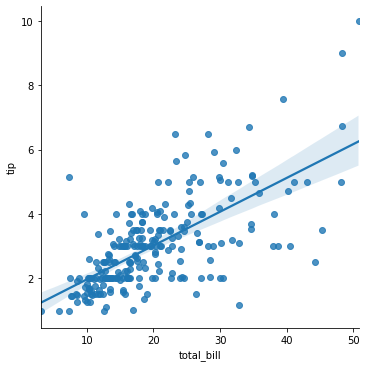

In [83]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

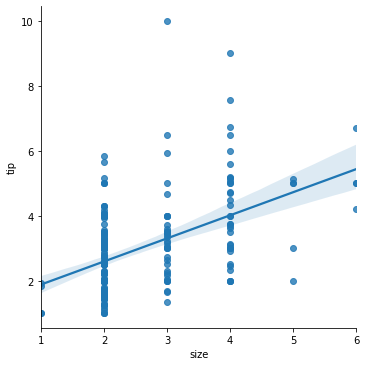

In [84]:
sns.lmplot(x = 'size', y = 'tip', data = tips)
plt.show()

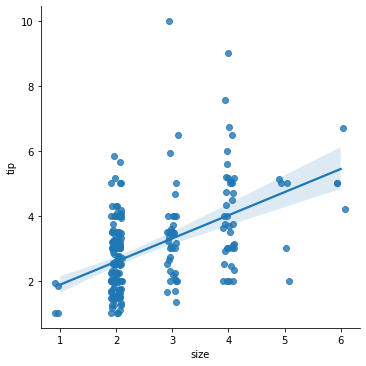

In [86]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.1)
plt.show()

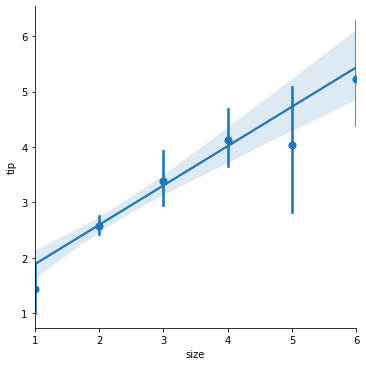

In [88]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)
plt.show()

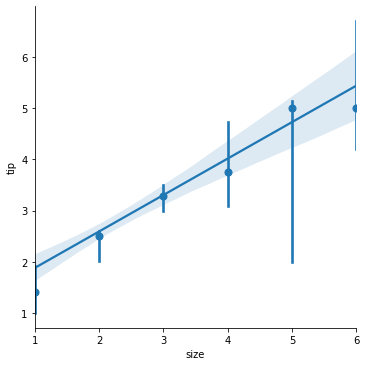

In [89]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.median)
plt.show()

In [93]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [95]:
ans['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

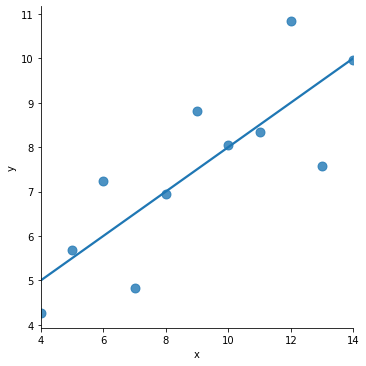

In [101]:
sns.lmplot(x = 'x', y = 'y', data = ans.query("dataset == 'I'"), ci = None, scatter_kws = {'s':80})
plt.show()

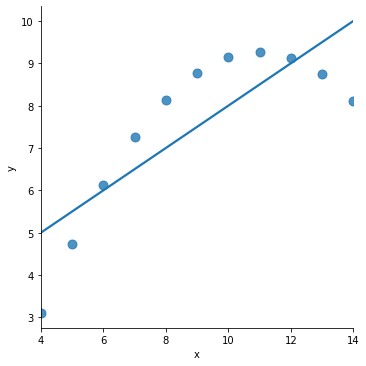

In [102]:
sns.lmplot(x = 'x', y = 'y', data = ans.query("dataset == 'II'"), ci = None, scatter_kws = {'s':80})
plt.show()

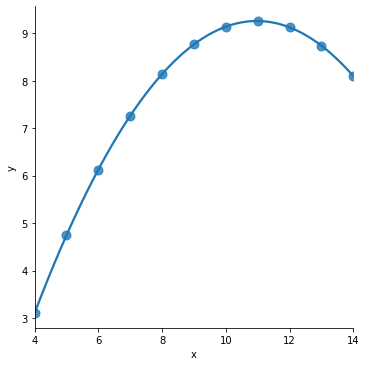

In [105]:
sns.lmplot(x = 'x', y = 'y', data = ans.query("dataset == 'II'"), ci = None, scatter_kws = {'s':80}, order = 2)
plt.show()

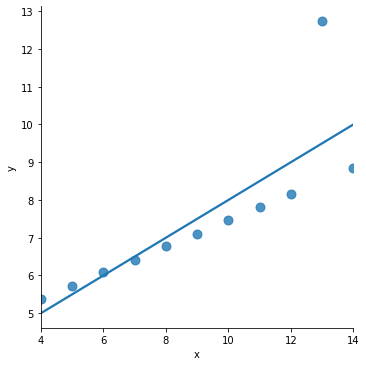

In [106]:
sns.lmplot(x = 'x', y = 'y', data = ans.query("dataset == 'III'"), ci = None, scatter_kws = {'s':80})
plt.show()

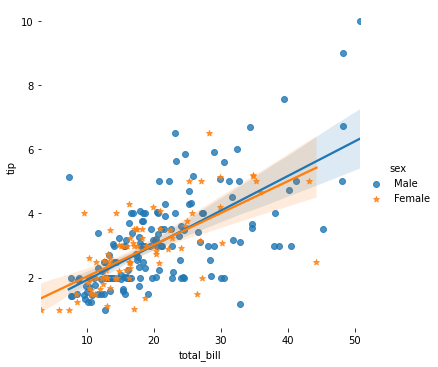

In [124]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', '*'])
#despine is used to remove axes for a cleaner look
sns.despine(left = True, bottom = True)
plt.show()

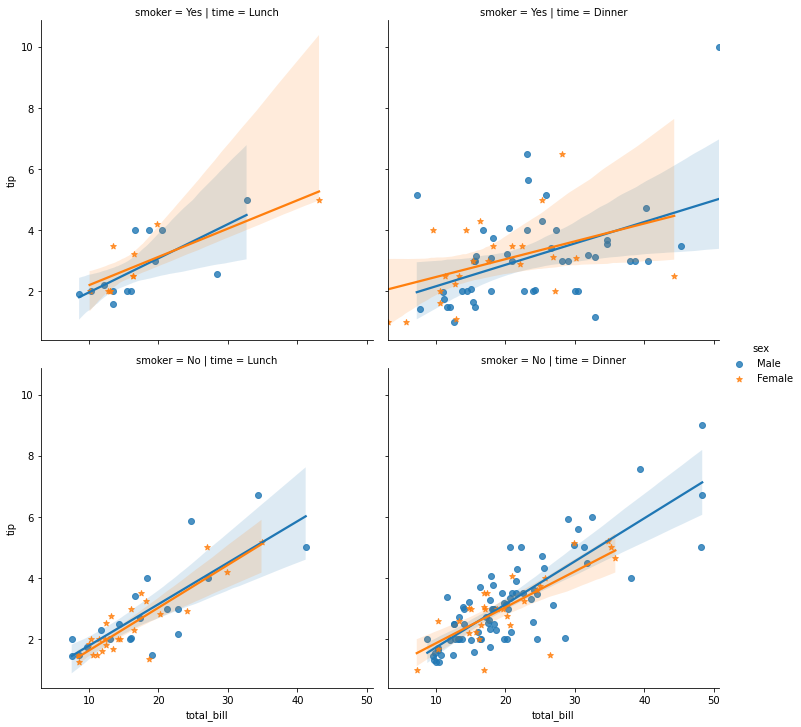

In [117]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', '*'], col = 'time', row = 'smoker')
plt.show()

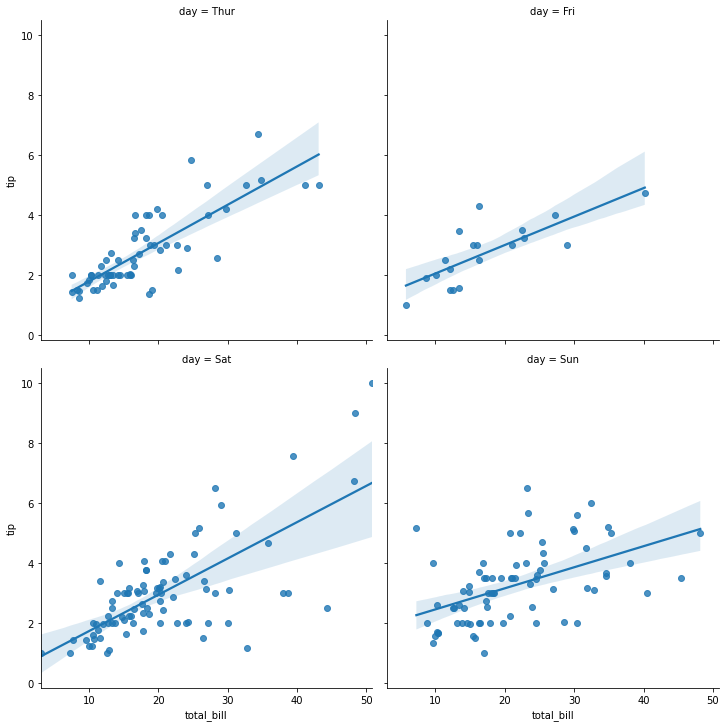

In [120]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', col_wrap = 2)
plt.show()